# Inspecting the Tag Data

In [2]:
import os, re
import itertools as it
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

## Reading in the Tag Data

In [3]:
labels_df = pd.read_csv('train_data/train_v2.csv')

In [4]:
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


Below we list all of the available tags:

In [5]:
label_list = sorted(set(it.chain.from_iterable(
                 labels_df.tags.apply(lambda s: s.split(" ")))))
print("There are %d tags in total:" % len(label_list),
      ', '.join(label_list))

There are 17 tags in total: agriculture, artisinal_mine, bare_ground, blooming, blow_down, clear, cloudy, conventional_mine, cultivation, habitation, haze, partly_cloudy, primary, road, selective_logging, slash_burn, water


In [6]:
print("The image tags occur in %d unique combinations"
      % len(np.unique(labels_df.tags)))

The image tags occur in 449 unique combinations


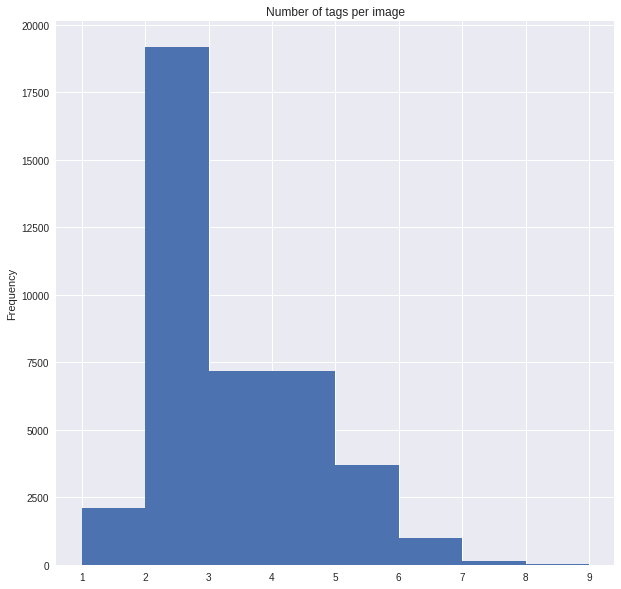

In [7]:
labels_df.tags\
         .apply(lambda s: len(s.split(" ")))\
         .hist(bins=8)
plt.title("Number of tags per image")
plt.ylabel("Frequency")

### Adding the file path to the data

In [8]:
labels_df['image_path'] = labels_df.image_name.apply(lambda f: os.path.join("train_data", f + ".jpg"))

### Encode the Tags as One-Hot Features

In [9]:
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(
                           lambda x: 1 if label in x.split(' ') else 0)

### Reordering the Data Columns

In [10]:
labels_df = labels_df[['image_name', 'image_path','tags', 'agriculture', 'artisinal_mine',
       'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy',
       'conventional_mine', 'cultivation', 'habitation', 'haze',
       'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn',
       'water']]

# save to file
labels_df.to_csv("train_data/train_v3.csv", index=None)

# Display head
labels_df.head()

,image_name,image_path,tags,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,train_data/train_0.jpg,haze primary,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,train_data/train_1.jpg,agriculture clear primary water,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,train_data/train_2.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,train_data/train_3.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,train_data/train_4.jpg,agriculture clear habitation primary road,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


Next we plot the frequency of occurence for each label

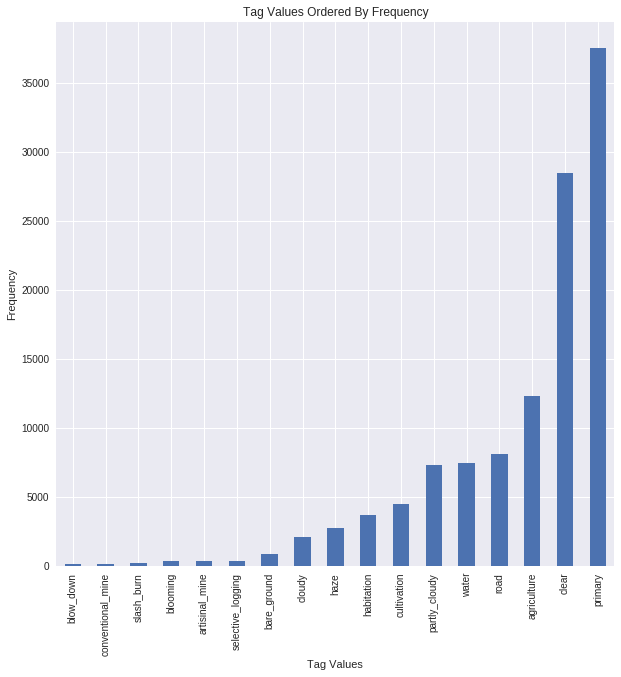

In [11]:
# Histogram of label instances
labels_df[label_list]\
    .sum()\
    .sort_values()\
    .plot(kind='bar',
          title='Tag Values Ordered By Frequency')
plt.xlabel("Tag Values")
plt.ylabel("Frequency")

We can also plot a coocurrence matrix for each of the labels.

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
agriculture,12315,38,225,32,22,9150,0,24,3377,2737,672,2493,11972,6034,65,119,2712
artisinal_mine,38,339,40,0,0,307,0,4,18,29,5,27,324,110,6,0,299
bare_ground,225,40,862,3,4,747,0,10,89,163,41,74,683,323,13,10,206
blooming,32,0,3,332,1,311,0,0,35,4,4,17,332,10,7,2,16
blow_down,22,0,4,1,98,85,0,0,8,3,0,13,98,2,1,2,3
clear,9150,307,747,311,85,28431,0,70,3527,3090,0,0,27668,6295,308,173,5502
cloudy,0,0,0,0,0,0,2089,0,0,0,0,0,0,0,0,0,0
conventional_mine,24,4,10,0,0,70,0,100,4,36,2,28,94,59,0,0,26
cultivation,3377,18,89,35,8,3527,0,4,4477,895,202,748,4455,1294,58,126,868
habitation,2737,29,163,4,3,3090,0,36,895,3660,129,441,3469,2786,13,41,915


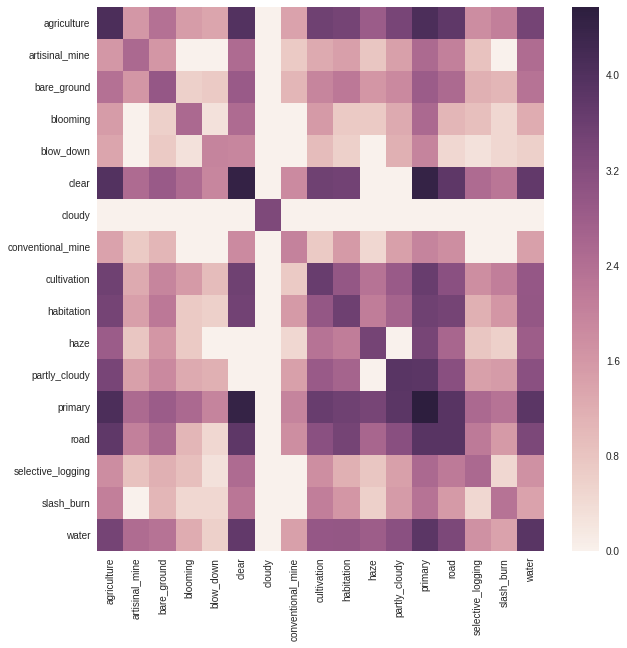

In [16]:
def make_cooccurence_matrix(labels, logplot=False):
    numeric_df = labels_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    
    if logplot:
        sns.heatmap(c_matrix.apply(lambda x: np.log10(x+1)))
    else:
        sns.heatmap(c_matrix)
    return c_matrix

# Compute the co-ocurrence matrix
make_cooccurence_matrix(label_list, logplot=True)

Each image should have exactly one weather label

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


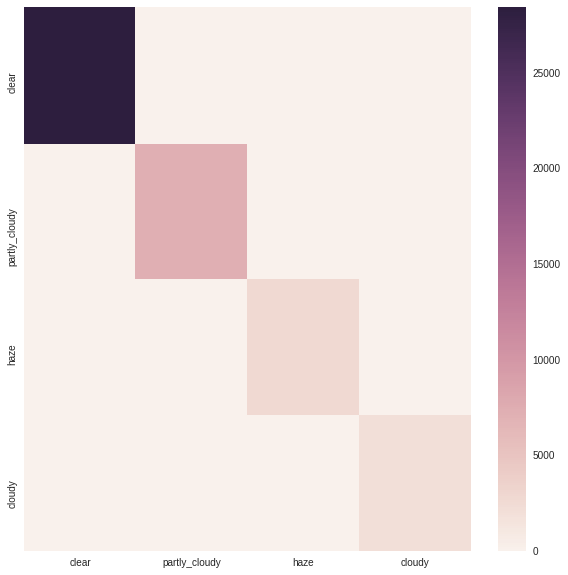

In [34]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

But the land labels may overlap:

,primary,agriculture,water,cultivation,habitation
primary,37513,11972,7001,4455,3469
agriculture,11972,12315,2712,3377,2737
water,7001,2712,7411,868,915
cultivation,4455,3377,868,4477,895
habitation,3469,2737,915,895,3660


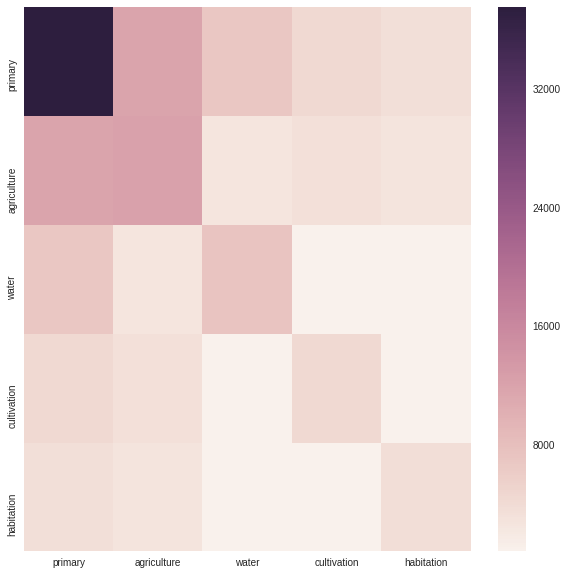

In [18]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

The rarer labels have very little overlap:

,artisinal_mine,bare_ground,blooming,blow_down,conventional_mine,selective_logging,slash_burn
artisinal_mine,339,40,0,0,4,6,0
bare_ground,40,862,3,4,10,13,10
blooming,0,3,332,1,0,7,2
blow_down,0,4,1,98,0,1,2
conventional_mine,4,10,0,0,100,0,0
selective_logging,6,13,7,1,0,340,2
slash_burn,0,10,2,2,0,2,209


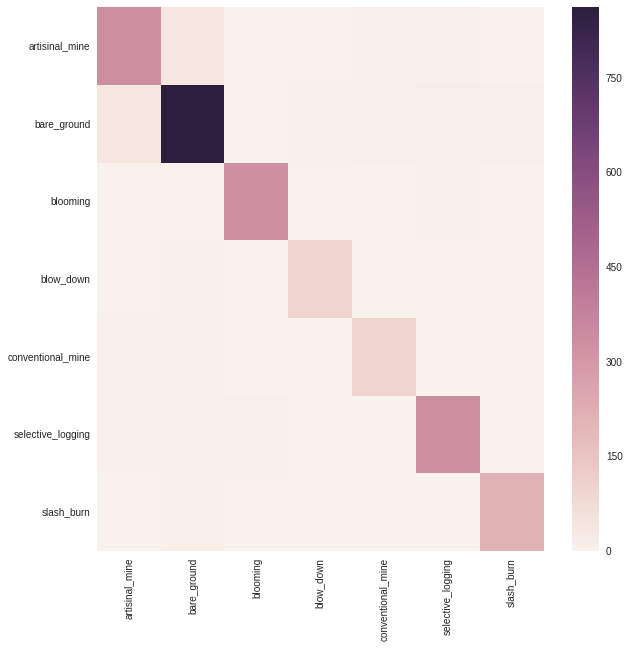

In [27]:
rare_labels = [l for l in label_list if labels_df[label_list].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)